# CSE 4238 | Project 2
---
---

# Sentiment Analysis for Tweets | Bi-LSTM | TensorFlow
---
---

## Assigned Task
---

My ID $\Rightarrow 170104093$

Last $3$ digits $\Rightarrow 093 \rightarrow 93$ 

---

**Dataset Selection**

Now, $93 \% 3 = 0$ and so [Dataset 1] was assigned.


---

**Model**


*Bidirectional RNN* needs to be used for the implementation


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Import Required Libraries
---
Importing libraries that will be required for the experiment.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Reading the Original Data
---
Read the original data from the CSV file found

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/CourseWork 4.2/SoftComp/Dataset 1.csv', engine = 'python')

data

,message,label
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...
10309,No Depression by G Herbo is my mood from now o...,1
10310,What do you do when depression succumbs the br...,1
10311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,dont mistake a bad day with depression! everyo...,1


## Understanding Data
---

Randomize the data and see what are the labels along with data in CSV

In [ ]:
data = data.sample(frac = 1., random_state = 14).reset_index(drop = True)

print(data['message'].value_counts(0))
data

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÂ                                                      11
25-04-18                                                                                                                                          4
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÂ â¦           4
Good morning                                                                                                                                      3
[Zicutake] Depression can be prevented by exercise  https://goo.gl/fb/Mu7k6tÂ                                                                     3
                                                                                                                                                 ..
Im having a shit ton of fun!  And Yay for meeting new friends/peeps. Lol.                                       

,message,label
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


## Dividing Dataset
---
Dividing dataset into a ratio of 6:2:2 as Training:Validation:Testing.

Also, *EPOCH* variable is declared for controlling how many epochs are needed for training.

After that, observe the data in Train, Val and Test splits.

Then we converted the data into NumPy array for later usage.

In [ ]:
EPOCH = 10

split_val = int(0.2 * data.shape[0])

dataTest = data.iloc[-split_val :]
dataVal = data.iloc[- 2 * split_val : -split_val]
dataTrain = data.iloc[: - 2 * split_val]

In [ ]:
print(dataTrain['message'].value_counts())

dataTrain

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÂ                                                                                                  9
Don't settle with #depression, #anxiety or defeat. #Jesus wants you to overcome. #faith #Prayer #bible #kalamazoo http://www.vwcenter.org/fervent-prayer.htmlÂ â¦                           2
Good morning                                                                                                                                                                                 2
[Zicutake] Depression can be prevented by exercise  https://goo.gl/fb/Mu7k6tÂ                                                                                                                2
How exercising can slash the risk of depression  https://nyp.st/2vGw2KqÂ  via @nypost                                                                                                        2
                                             

,message,label
0,@1WineDude That's a really cool giveaway!,0
1,Need a good web series? Check out GIANTS on Yo...,1
2,Procastinated by doing up a new playlist for T...,0
3,"@ZeenaBoBeena eeeek!!!! Good luck, Zeena!!! Yo...",0
4,@ChynaDoll74 Good morning to you too,0
...,...,...
6185,"free draw, lit easily, puffing away",0
6186,Depression is coming i feel it my veins just w...,1
6187,at gator joe's with heather and then movies to...,0
6188,Ughhh so over nightmares - So Instead of sleep...,0


In [ ]:
print(dataVal['message'].value_counts())

dataVal

The Stock Market Is Having its Worst Second Quarter Since the Great Depression  http://fortune.com/2018/04/02/stock-market-nyse-worst-second-quarter-depression/Â â¦    2
@mbolden LOL, yeah that Tweet got cut off. Premature Tweets happen to the best of us                                                                                     1
Sorting out my car insurance. Lady on phone is currently trying to get me a better deal from her boss!!                                                                  1
another 30 mile bike ride to Mequon and back - took a much more sane route   Lake Drive back into town is awesome!                                                       1
@shawn7155 If I don't get a chance 2 talk 2 you before hand, have a most awesomest weekend &amp; I'll miss you! Be safe and be well.  Love u!                            1
                                                                                                                                                 

,message,label
6190,"@pilucha ok, no more drinking away of the sorr...",0
6191,Earl's wearing a tie,0
6192,Loving @gilesbennet teaching style - like Dr S...,0
6193,hangin with ledd nd court.,0
6194,under 24 hours left to vote for @protagonize a...,0
...,...,...
8247,Look at the cute hat I got today...I look scar...,0
8248,@firesty hey ya )) like ur new pic i have one...,0
8249,@Styla73 Thank you.,0
8250,@stephjonesmusic http://twitpic.com/6bclz - ah...,0


In [ ]:
print(dataTest['message'].value_counts())

dataTest

More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÂ â¦                                                                                               2
Lonely millennials twice as likely to experience depression or anxiety, finds study  http://www.independent.co.uk/life-style/millennials-lonely-depression-anxiety-mental-health-odds-doubling-unemployed-study-a8319686.htmlÂ â¦    2
Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÂ                                                                                                                                           2
could not sleep last night and is back to work today yikes! first day of summer session!                                                                                                                                              1
Watching season 4 of Weeds. Almost half way throug!  the con is over tom

,message,label
8252,One of my mini poems. #helenswriting#mentalhea...,1
8253,@y2kprawn you went to college here? Didn't kno...,0
8254,The Young Life Podcast #1 - Depression 101: h...,1
8255,'s hair is so soft today.,0
8256,At the point where I'm legitimately pissed whe...,1
...,...,...
10309,Summer session starts today Why am I smiling.,0
10310,@Desireeeeee really me to.!,0
10311,@Jason_Pollock I think they heard you.,0
10312,@OliviaMaynard13 You're most welcome. I don't ...,1


In [ ]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

# # To check the outcome
# print(trainX)
# print(trainY)
# print(valX)
# print(valY)
# print(testX)
# print(testY)

# print(trainX.shape)
# print(trainY.shape)
# print(valX.shape)
# print(valY.shape)
# print(testX.shape)
# print(testY.shape)

## Tokenizing Data
---

Processing the data. Use train data to fit on the text. Later use it to construct sequences for all of the train, val, test quality.

In [ ]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

In [ ]:
# # To check the outcome
# print(trainX)
# print(valX)
# print(testX)
# print('=====')
# print(train_seqs)
# print(val_seqs)
# print(test_seqs)
# print('=====')
# print(train_seqs.shape)
# print(val_seqs.shape)
# print(test_seqs.shape)

## Develop Model
---
Develop the model and print it.

Train the model and observe the values.

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         2072576   
_________________________________________________________________
bidirectional_28 (Bidirectio (None, None, 1024)        656384    
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 128)               139392    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 2,868,481
Trainable params: 2,868,481
Non-trainable params: 0
_________________________________________________________________


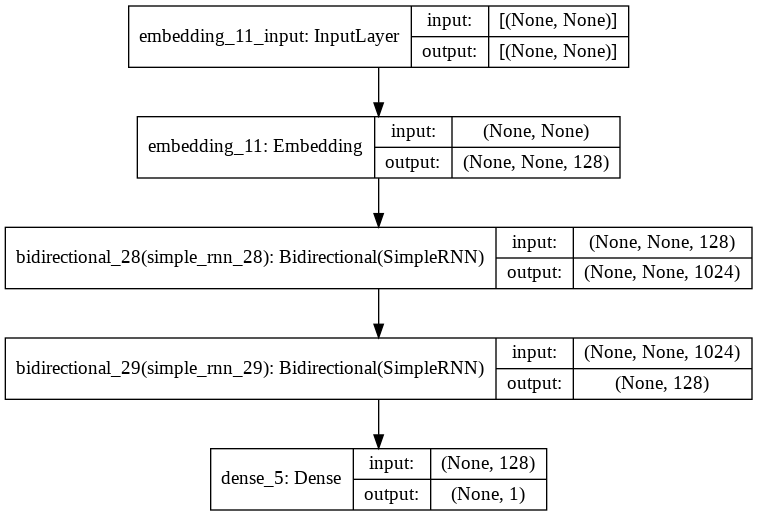

In [ ]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.SimpleRNN(512, return_sequences = True,activation="relu")))
model.add(layers.Bidirectional(layers.SimpleRNN(64, return_sequences =  False,activation="relu")))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()
plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

Epoch 1/10
194/194 [==============================] - 105s 527ms/step - loss: 68594.7422 - accuracy: 0.8879 - val_loss: 0.0303 - val_accuracy: 0.9937
Epoch 2/10
194/194 [==============================] - 102s 526ms/step - loss: 0.0144 - accuracy: 0.9971 - val_loss: 0.0314 - val_accuracy: 0.9937
Epoch 3/10
194/194 [==============================] - 103s 529ms/step - loss: 0.0107 - accuracy: 0.9981 - val_loss: 0.0296 - val_accuracy: 0.9937
Epoch 4/10
194/194 [==============================] - 102s 526ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0280 - val_accuracy: 0.9942
Epoch 5/10
194/194 [==============================] - 102s 528ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0301 - val_accuracy: 0.9937
Epoch 6/10
194/194 [==============================] - 104s 538ms/step - loss: 0.0025 - accuracy: 0.9995 - val_loss: 0.0295 - val_accuracy: 0.9937
Epoch 7/10
194/194 [==============================] - 103s 532ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 0.02

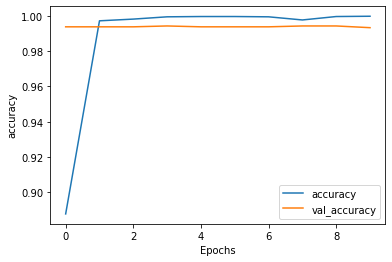

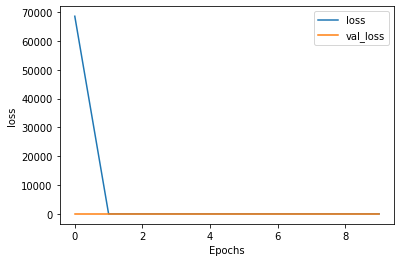


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.887884 	 68594.742188 	   0.993695 	   0.030264
       2   0.997092 	   0.014377 	   0.993695 	   0.031365
       3   0.998061 	   0.010711 	   0.993695 	   0.029598
       4   0.999354 	   0.003574 	   0.994180 	   0.028020
       5   0.999515 	   0.002123 	   0.993695 	   0.030065
       6   0.999515 	   0.002515 	   0.993695 	   0.029520
       7   0.999354 	   0.001418 	   0.993695 	   0.029472
       8   0.997577 	   0.016096 	   0.994180 	   0.029717
       9   0.999515 	   0.002510 	   0.994180 	   0.030523
      10   0.999677 	   0.001531 	   0.993210 	   0.033626


In [ ]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

## Find Performance
---
Use the developed model to see how it performs in al the datasets.

Separate performance was calculated for all the Train, Val and Test data.

### Train Data Performance

194/194 [==============================] - 21s 106ms/step - loss: 0.0011 - accuracy: 0.9997
Train Loss: 0.0010786886559799314
Train Accuracy: 0.9996768832206726 (Model Metric)
Train Accuracy: 0.9996768982229403 (sklearn Metric)
Train Precision: 0.9992887624466572
Train Recall: 0.9992887624466572
Train F1-score: 0.9992887624466572


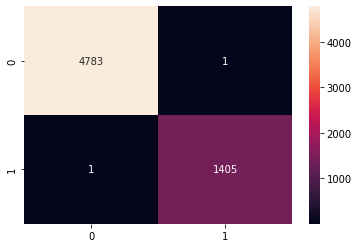

In [ ]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

### Val Data Performance

65/65 [==============================] - 6s 86ms/step - loss: 0.0336 - accuracy: 0.9932
Validation Loss: 0.03362605348229408
Validation Accuracy: 0.99321049451828 (Model Metric)
Validation Accuracy: 0.9932104752667313 (sklearn Metric)
Validation Precision: 0.9933035714285714
Validation Recall: 0.9758771929824561
Validation F1-score: 0.9845132743362831


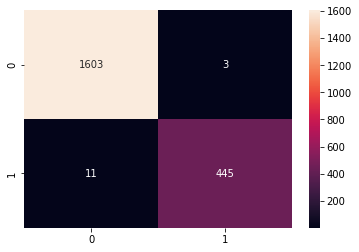

In [ ]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

### Test Data Performance

65/65 [==============================] - 6s 78ms/step - loss: 0.0285 - accuracy: 0.9927
Test Loss: 0.028454797342419624
Test Accuracy: 0.9927254915237427 (Model Metric)
Test Accuracy: 0.992725509214355 (sklearn Metric)
Test Precision: 0.9823399558498896
Test Recall: 0.9845132743362832
Test F1-score: 0.9834254143646409


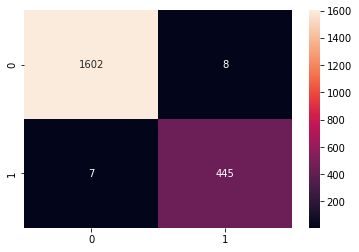

In [ ]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')